# Change background of blue screen images
### In this notebook we are going to pass through all the steps to create a background changers using only Python, Numpy, OpenCv and Matplotlib to show the images.

# Import resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Read and display the image

In [2]:
#load the data
image = cv2.imread("images/women_blue_screen.jpg")

#print the type of data and its dimensions
print("data type : ", type(image),
      " with dimensions : ", image.shape)

data type :  <class 'numpy.ndarray'>  with dimensions :  (500, 500, 3)


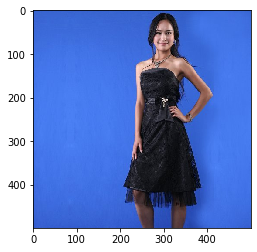

In [3]:
%matplotlib inline

#make a copy of the image
image_copy = np.copy(image)

#change the image from BGR to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

#display the image
plt.imshow(image_copy)

## Create the blue color threshold boundaries

In [4]:
#lets define the lower and upper bound for the color that we want to isolate "Blue"
lower_blue = np.array([40, 75, 180])
upper_blue = np.array([80, 130, 255])

## Create a mask to isolate the blue screen area based on the lower and upper bounds

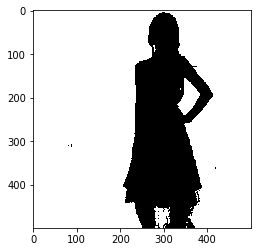

In [5]:
#define the mask
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

#visualise the mask
plt.imshow(mask, cmap="gray")

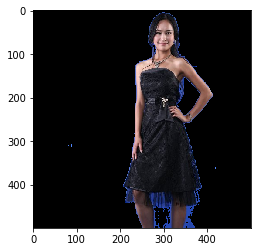

In [6]:
#mask the image to let the women show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

#display the msked image
plt.imshow(masked_image)

### Add a background image to the masked image

(1350, 1500, 3)


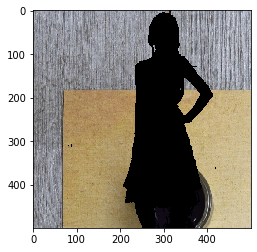

In [7]:
# load the background image
background_image = cv2.imread("images/background_01.jpg")
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# print the shape of the background image
print(background_image.shape)

# cropp the backgroudn image to fit the masked image
cropped_background_image = background_image[0:500, 0:500]

# mask the crooped image but this time the women area is blocked
cropped_background_image[mask == 0] = [0, 0, 0]

# show the masked background image
plt.imshow(cropped_background_image)

### Now the magic happens just by adding the two images together to create a new image

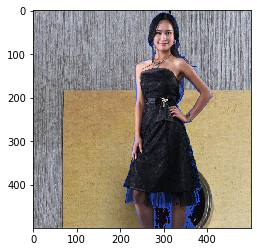

In [8]:
# add the two images to create a new image
complete_image = masked_image + cropped_background_image

plt.imshow(complete_image)